In [1]:
import opt_mo
import axelrod as axl

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import sympy as sym

In [4]:
sym.init_printing()

In [5]:
import itertools

In [6]:
import matplotlib.pyplot as plt
import matplotlib

In [7]:
font = {'size'   : 15,
        'weight': 'bold'}
matplotlib.rc('font', **font)

In [8]:
solutions = []
for i in [21]:#range(40):
    axl.seed(i)
    opponents = [np.random.random(4) for _ in range(1)]
    
    solution_set = opt_mo.reactive_set(opponents)
    solutions.append(opt_mo.argmax(opponents, solution_set))

**Visualise**

In [9]:
def plot_argmax(opponents, solution, filename):
    p_1, p_2 = sym.symbols('p_1, p_2')
    p = (p_1, p_2, p_1, p_2)
    
    p_one, p_two = np.linspace(0, 1, 50), np.linspace(0, 1, 50)
    utility = -opt_mo.tournament_utility(p, opponents)
    
    expr = sym.lambdify((p_1, p_2), utility.simplify())
    
    plt.figure()
    X, Y = np.meshgrid(p_one, p_two)
    Z = expr(X, Y)
    
    plt.contourf(X, Y, Z);
    plt.colorbar();
    plt.plot(solution[0], solution[1], marker='x', color='r', markersize=20, markeredgewidth=5)
    plt.ylabel(r'$p_2$')
    plt.xlabel(r'$p_1$')
    plt.tight_layout()
    plt.savefig(filename);

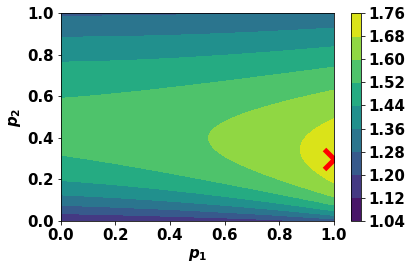

In [11]:
for i in [21]:#range(40):
    axl.seed(i)
    opponents = [np.random.random(4) for _ in range(1)]
    
    plot_argmax(opponents, solutions[0], '../img/reactive/reactive_pairwise_{}.pdf'.format(i))

In [12]:
from sympy.polys import subresultants_qq_zz

In [13]:
axl.seed(21)
opponent = [np.random.random(4)]

In [14]:
solution_set = opt_mo.reactive_set(opponent)

In [17]:
k = [1, 2, 3, 4, 5]
k = k[:1] + k[3:]

In [18]:
k

In [22]:
cols[:5]

['index', '$q_1$', '$q_2$', '$q_3$', '$\\bar{q}_1$']

In [19]:
    cols = ['index', '$q_1$', '$q_2$', '$q_3$', r'$\bar{q}_1$', r'$\bar{q}_2$',
            r'$\bar{q}_3$', r'$\bar{q}_4$', '$p_1 ^ *$', '$p_2 ^ *$', '$u_q$',
             'Optimisation time']

In [53]:
p_1, p_2 = sym.symbols('p_1, p_2')
utility = -opt_mo.tournament_utility((p_1, p_2, p_1, p_2), opponents)
    
# derivatives
derivatives = [sym.diff(utility, i) for i in [p_1, p_2]]
derivatives = [expr.factor() for expr in derivatives]
    
# numerator
fractions = [sym.fraction(expr) for expr in derivatives]
num = [expr[0] for expr in fractions]
den = [expr[1] for expr in fractions]

In [55]:
matrix = subresultants_qq_zz.sylvester(num[0], num[1], p_2)
matrix = opt_mo.round_matrix_expressions(matrix, 8, p_1)

resultant = matrix.det()

In [62]:
x = sym.fraction(resultant)[0].factor()

In [63]:
coeffs = sym.Poly(x, p_1).all_coeffs()
roots = list(np.roots(coeffs))

In [68]:
x.subs({p_1:1})

In [46]:
p_one_roots = opt_mo.get_roots_of_first_unknown(num, p_1, p_2)

In [47]:
p_one_roots

In [31]:
num[0].factor().subs({p_1: 0}), num[1].factor().subs({p_1: 0})

In [15]:
solution_set

{0, 1}